In [1]:
import numpy as np
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import datasets
import mglearn
import math
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


I will start with the distinction between regression and classification problems. Let's start with a classification problem. In this case, we have targets as discrete values. Here is a forge dataset of mglearn as an example:

In [2]:
X,y = mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second Feature')

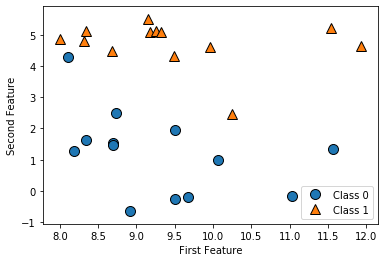

In [3]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
pl.legend(["Class 0","Class 1"], loc = 4)
pl.xlabel("First Feature")
pl.ylabel("Second Feature")

In [4]:
print("Shape of the X:{}".format(X.shape))

Shape of the X:(26, 2)


Below is the regression problem, where we have target values taking continuous values:

Text(0, 0.5, 'Targets')

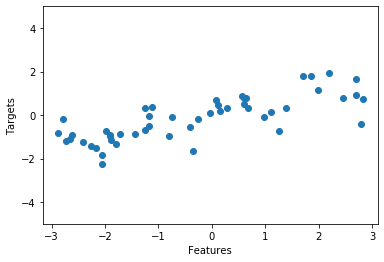

In [5]:
X, y = mglearn.datasets.make_wave(n_samples = 50)
pl.plot(X,y,"o")
pl.ylim([-5,5])
pl.xlabel("Features")
pl.ylabel("Targets")

Now, proceed with sklearn's classification dataset about breast cancer datas, distinguishing "benign" (harmless) and "malignant" (cancerous) tumors:

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print(cancer['DESCR'][:300])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radiu


In [10]:
print(cancer['target_names'])

['malignant' 'benign']


In [11]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print(cancer['feature_names'].shape)

(30,)


* We see that there is a lot of feature here. We can't visualize this data as like we did above.

In [13]:
print("Target counts:{}".format({a: b for a,b in zip(cancer.target_names,np.bincount(cancer.target))}))

Target counts:{'malignant': 212, 'benign': 357}


We will also be using a real-world regression dataset, the Boston Housing dataset.
The task associated with this dataset is to predict the median value of homes in sev‐
eral Boston neighborhoods in the 1970s, using information such as crime rate, prox‐
imity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features:


In [14]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In [16]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [17]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
print(boston['target'].shape)

(506,)


In [20]:
print(boston['data'].shape)

(506, 13)


In [21]:
X, y = mglearn.datasets.load_extended_boston()

In [22]:
print("X_shape : {} ".format(X.shape))

X_shape : (506, 104) 


Above, we saw the types of datasets. Now, let's get back to the forge dataset and analyse it with respect to KNN algorithm:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X, y = mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
X_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
clf = KNeighborsClassifier(n_neighbors = 3)

In [28]:
fitdata = clf.fit(X_train,y_train)

We trained our model with train data. Now, it is the turn to predict:

In [29]:
print("Predictions:{}".format(clf.predict(x_test)))
y_predict = clf.predict(x_test)

Predictions:[1 0 1 0 1 0 0]


Now, look for the accuracy:

In [30]:
print("Accuract:{}".format(np.mean(y_predict == y_test)))

Accuract:0.8571428571428571


In [31]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

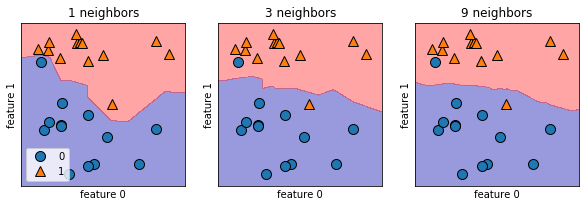

In [32]:
fig, axes = pl.subplots(1,3,figsize = (10,3))
for n_neighbors,ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax = ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc = 3)

Let's look at the accuracy change with the variation of the number of neighbors by analyzing breast cancer database:

In [33]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [34]:
X,y = cancer['data'],cancer['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

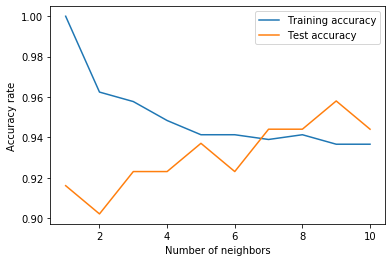

In [36]:
train_accuracy = []
test_accuracy = []
n = [1,2,3,4,5,6,7,8,9,10]
for n_neighbors in n:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train,y_train)
    knn.predict(X_test)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
pl.plot(n,train_accuracy, label = "Training accuracy")
pl.plot(n,test_accuracy, label = "Test accuracy")
pl.xlabel("Number of neighbors")
pl.ylabel("Accuracy rate")
pl.legend()

Now try the knn algorithm on the continuous data set, which we will call as "knn regression":

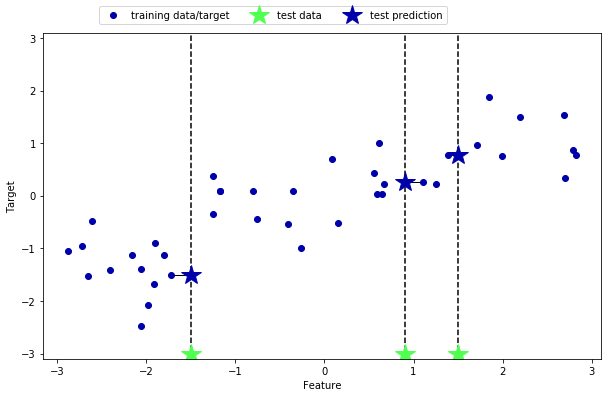

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

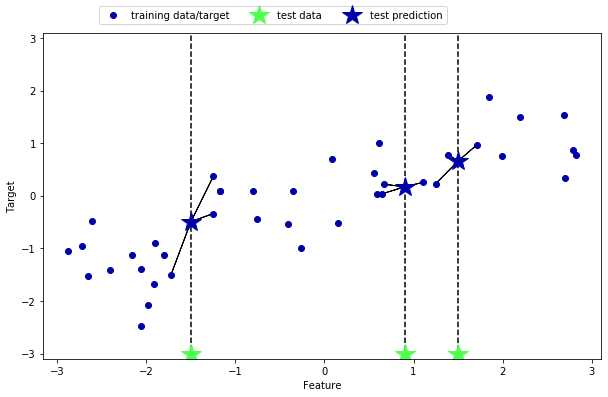

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
X,y = mglearn.datasets.make_wave(n_samples=40)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [53]:
regression = KNeighborsRegressor(n_neighbors = 3)

In [54]:
regression.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [55]:
predictions = regression.predict(X_test)

In [56]:
print("Accuracy in test: {}".format(regression.score(X_test,y_test)))

Accuracy in test: 0.8344172446249604


In [57]:
print("Accuracy in train: {}".format(regression.score(X_train,y_train)))

Accuracy in train: 0.8194343929538755


Now, visualize this:

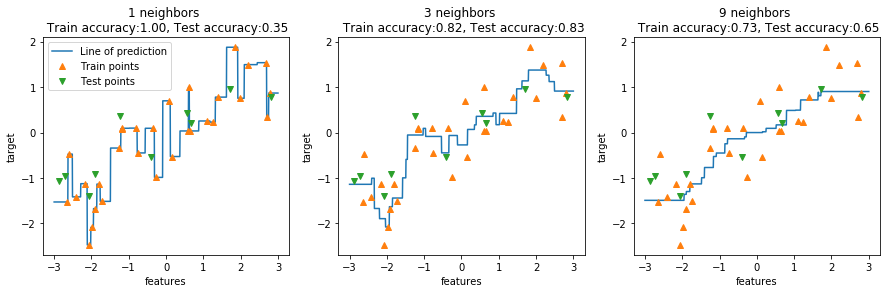

In [70]:
fig, axes = pl.subplots(1,3, figsize = (15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for  n_neighbors, ax in zip([1,3,9], axes):
    knn = KNeighborsRegressor(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    predictions = knn.predict(line)
    ax.plot(line,predictions)
    ax.plot(X_train,y_train,'^')
    ax.plot(X_test,y_test,'v')
    ax.set_title("{} neighbors \n Train accuracy:{:.2f}, Test accuracy:{:.2f}".format(n_neighbors,knn.score(X_train,y_train),knn.score(X_test,y_test)))
    ax.set_xlabel("features")
    ax.set_ylabel("target")
axes[0].legend(["Line of prediction","Train points","Test points"], loc = "best")

Although KNN algorithm is easy to understand and straightforward, it is not used so much. That's because of two fundamental reasons:
* It can't handle too many features
* The prediction process is very slow

So we should seek for much more efficient models. The next model I will look for will be linear models.